### GSEA analysis in regulons

* Done seperately for activators and repressors
* gmt files were genreated based on regulatory networks parsed from RegulonDB 9.4


In [68]:
import gseapy
import matplotlib
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods')
from settings import *
import helpers
%matplotlib inline
config_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/regulon_analysis/config"
config_dict = helpers.process_config(config_file)

# Output
figures_dir = config_dict["out_dir"]["figures"]
results_dir = config_dict["out_dir"]["results"]

# Strain Info

strain_info = pd.read_csv(strain_info_file, index_col=0)

# Regulon info
regulon_csv = config_dict["out_dir"]["regulon_csv"]
activator_gmt = config_dict["out_dir"]["activator_gmt"]
repressor_gmt = config_dict["out_dir"]["repressor_gmt"]
# Counts/TPMs
counts_file = config_dict["data"]["core_tpms"]
data_set = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/deseq_norm_counts.csv"

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [86]:
###
# Create activator and repressor gene sets
regulon = pd.read_csv(regulon_csv, index_col=0)
regulon.columns = ["regulator", "regulated", "bnum", "function"]
if os.path.isfile(activator_gmt):
    os.remove(activator_gmt)
if os.path.isfile(repressor_gmt):
    os.remove(repressor_gmt)
for group_name, group  in regulon.groupby(["function", "regulator"]):
    if group_name[0] == "activator":
        print("{}\t{}".format(group_name[1], "\t".join(group.bnum.values)))
        with open(activator_gmt, "a") as fo:
            fo.write("{}\tNA\t{}\n".format(group_name[1], "\t".join(group.bnum.values)))            
    elif group_name[0] == "repressor":
        print("{}\t{}".format(group_name[1], "\t".join(group.bnum.values)))
        with open(repressor_gmt, "a") as fo:
            fo.write("{}\tNA\t{}\n".format(group_name[1], "\t".join(group.bnum.values)))

ada	b2213	b2212	b4187	b2068
adiY	b3517	b3214	b3212	b1493	b4117	b3213	b3516	b1492
allS	b0516	b0517	b0515
appY	b0972	b0975	b0979	b0978	b0974	b0973	b0976	ECK120030072	b0980	b0977
araC	b0064	b1901	b2841	b2840	b0062	b1900	b0396	b0063	b0061	b1899
arcA	b2296	b0728	b0972	b0827	b0979	b0037	b0886	b0976	b1011	b0978	b0973	b0734	b3517	b0620	b1009	b1007	b1212	b0621	b3569	b1006	ECK120030072	b0723	b0733	b0826	b0904	b0721	b1010	b1211	b3512	b2579	b0038	b0039	b0040	b0974	b1012	b1008	b4122	b4239	b4240	b0975	b0724	b0726	b3516	b0602	b0619	b1160	b1210	b0980	b0036	b0887	b0035	b0977	b0903	b0722	b0727	b0729
argP	b0031	b3702	b2235	b1761	b2156	b2236	b4024	b3701	b2923	b3700	b2838	b0166	b2234
argR	b1747	b1748	b1746	b1745	b1744
asnC	b3744
atoC	b2224	b2221	b2222	b2223
baeR	b2077	b1743	b2074	b2075	b2079	b2076	b2470	b2078
basR	b3025	b1552	b1040	b1039	b0460	b0461	b4042	b3026	b1038	b1037	b4312
bglJ	b3723	b1411	b3013	b3027	b1877	b1410	b0392	ECK120001917	b3680	b3188	b1409	b3721	b1762	b0076	b1408	b3722
cadC	b4133	b4132	b413

ilvY	b3773	b3773
iscR	b0975	b0974	b3414	b2207	b0972	b2631	b2529	b0156	b2203	b2204	b2528	b0973	b2206	b0976	b2630	b2205	b2202	b0977	b2208	b2531	b2530
kdgR	b1851	b1850
lacI	b0344	b0343	b0342
leuO	b1954	b4133
lexA	b1741	b4044	b1860	b1061	b0091	b2820	b0095	b1913	b3066	b0708	b0233	b1183	ECK120002670	b4043	b0958	b1848	b3558	b0685	ECK120001917	b0096	b0094	b0083	b2616	b0226	b1184	b2699	b0779	ECK120002669	b0060	ECK120002654	b3065	b2821	b0086	b0890	b0225	b1914	b1728	b4058	b3813	b3645	b0090	b4059	b0092	b0089	b0088	b0085	b0799	b2698	b3067	b0093	b0087	b0084	b2009	b0234	b0232	b1861	b2819	b0231	b4347
lldR	b3603	b3604	b3605
lrhA	b1891	b1892
lrp	b4009	b2588	b2589	b3272	b3275	b3456	b4187	b1190	ECK120048853	b3769	b3769	ECK120002505	b3853	b3971	b3969	b0201	b3273	b3460	b3454	b0078	b1243	b1247	b3508	b2215	ECK120004461	b3766	b4010	b4007	b3274	b3277	b1241	b2215	ECK120048853	ECK120000491	b3766	b1798	b3572	b1482	b3970	b3759	b3758	b3756	b1245	b3510	b2290	b2913	b2591	b4129	b3772	b3771	b3770	ECK120000491	b3855	b385

In [107]:
# Compare results from normalized tpms and DESeq2 normalized results
tpm = pd.read_csv(counts_file, index_col=0)
tpm = tpm[[c for c in tpm.columns if "tpm" in c]]
tpm.columns = [c.split("_tpm")[0] for c in tpm.columns]
print(tpm.shape)
cls = ["UR","UTI"]*14


(2653, 28)


In [111]:
dt.datetime.today()

datetime.datetime(2018, 9, 4, 11, 53, 19, 419842)

In [124]:
def run_gsea(data, gene_set, cls, outdir, fdr=0.1):
    today = dt.datetime.today().strftime("%Y-%m-%d")
    prefix = "{}_{}_gsea_run.csv".format(today, os.path.basename(gene_set).split(".")[0])
    gsea_run = gseapy.gsea(data=data, gene_sets=gene_set, cls=cls, outdir=outdir,
                           min_size=10, method="signal_to_noise")
    result = pd.DataFrame(gsea_run.results).T
    result = result[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]].sort_values('fdr')
    result.to_csv(os.path.join(outdir, prefix))
    
    results_short = (result[["nes", "fdr",  "geneset_size", "matched_size", "genes"]][result.fdr < 0.1]
                     .sort_values(["nes", "fdr"]))
    results_short.columns = ["NES", "FDR", "Regulon Size", "Matched Size", "Genes"]
    return results_short

In [135]:
gene_set = activator_gmt
activated = run_gsea(tpm, gene_set, cls, results_dir)
activated

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


,NES,FDR,Regulon Size,Matched Size,Genes
fadR,-2.34149,0.000749465,12,11,"b2316,b1288,b1187,b4018,b0954,b3256,b2323,b109..."
mlrA,-1.73887,0.0314775,10,10,"b1040,b1038,b1039,b1037,b4133,b3185,b3190,b318..."
fis,-1.62998,0.0479657,151,57,"b1237,b2579,b3845,b4382,b4000,b2239,b4032,b278..."
csgD,1.66363,0.0594649,13,12,"b1003,b0382,b1004,b1040,b1038,b0964,b1042,b103..."
crp,1.82332,0.0125094,425,277,"b3429,b2913,b3236,b3357,b3430,b2840,b0757,b290..."
lrp,2.19515,0,38,19,"b2913,b0077,b3212,b2903,b2905,b2923,b2904,b090..."


In [126]:
gene_set = repressor_gmt
repressed = run_gsea(tpm, gene_set, cls, results_dir)
repressed

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


,NES,FDR,Regulon Size,Matched Size,Genes
purR,-1.79497,0.0245499,31,31,"b2903,b2905,b2551,b2904,b0033,b0032,b2553,b417..."
hns,1.50994,0.0862242,144,62,"b0889,b0757,b0077,b0758,b0759,b0756,b1482,b123..."
nagC,1.53374,0.0821418,33,27,"b1736,b1735,b1733,b0679,b1734,b1738,b0676,b431..."
fur,1.5624,0.0752262,110,66,"b3212,b3070,b4019,b2741,b0167,b0928,b3409,b257..."
narL,1.76818,0.0126697,87,65,"b4139,b1671,b4138,b1669,b2993,b4040,b4153,b062..."
metJ,1.89945,0.00158371,15,14,"b2153,b0197,b0199,b3828,b3829,b3008,b2152,b019..."
lrp,1.91921,0.00316742,85,27,"b0889,b2913,b0077,b3454,b1482,b3456,b0078,b229..."


In [167]:
def vis_regulon(regulator, regulon_anlaysis_table, counts, figsize=(12,6)):
    regulon = regulon_anlaysis_table.loc[regulator].Genes.split(",")
    print(len(regulon))
    regulon_expr = counts.loc[regulon]
    
    sns.clustermap(np.log2(regulon_expr+1), cmap=my_cmap, linewidths=0.5, linecolor='black', figsize=figsize)
    return f

27


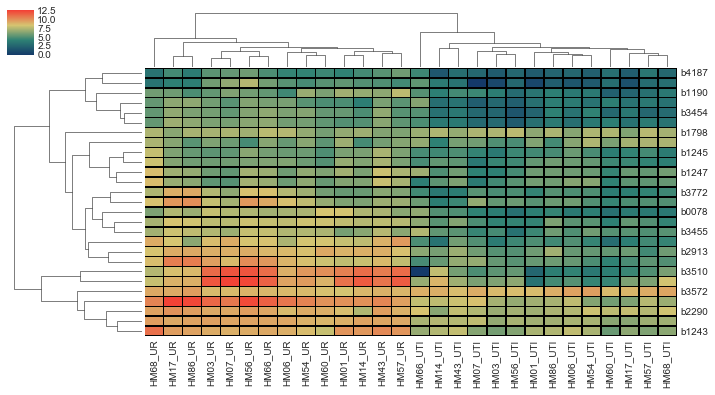

In [168]:
f = vis_regulon('lrp', repressed, tpm)

19


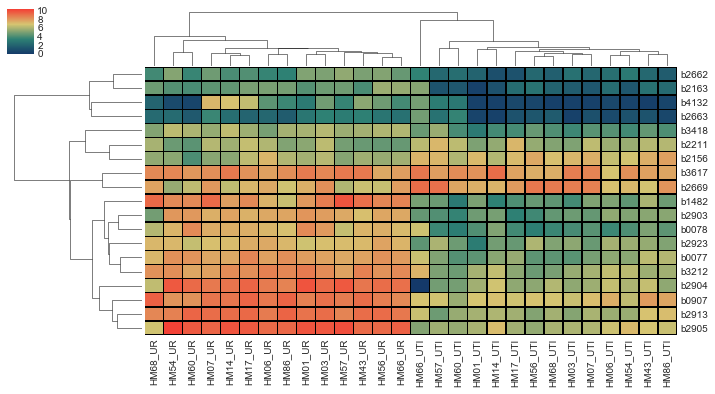

In [169]:
f = vis_regulon('lrp', activated, tpm)

31


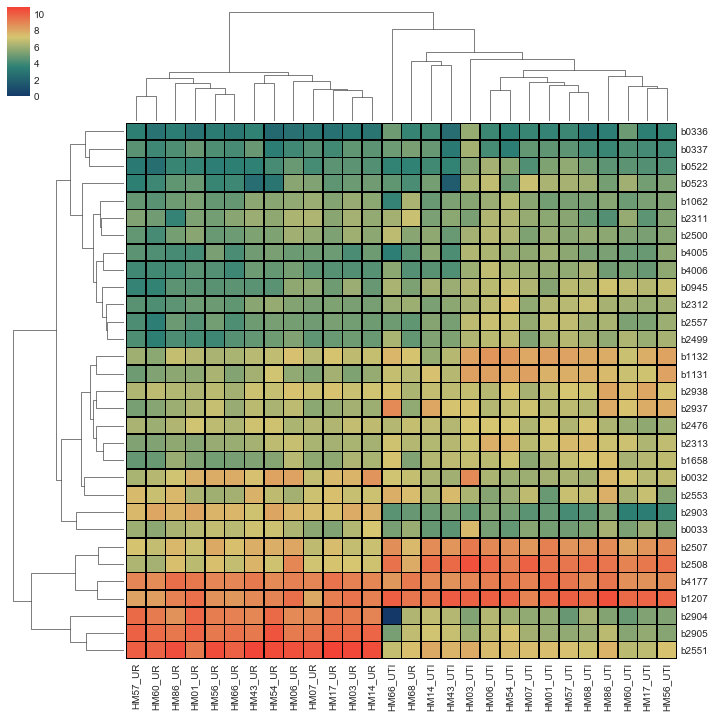

In [177]:
f = vis_regulon('purR', repressed, tpm, (12, 12))

11


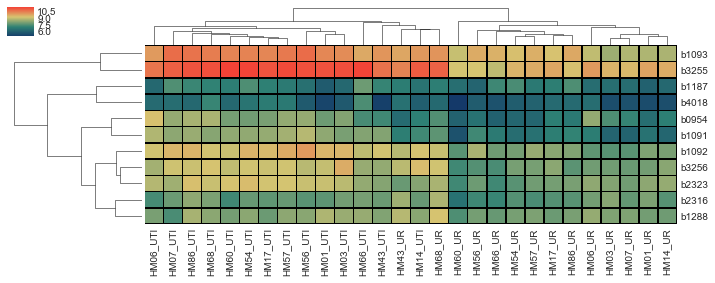

In [175]:
f = vis_regulon('fadR', activated, tpm, (12, 4))

66


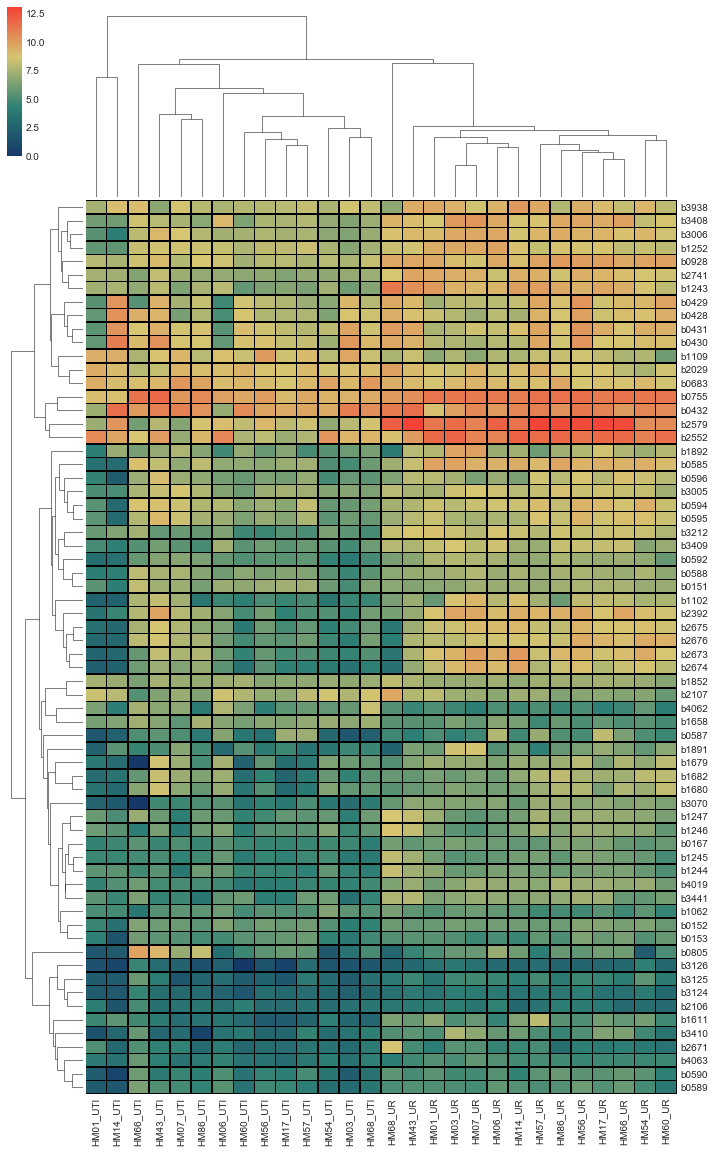

In [179]:
f = vis_regulon('fur', repressed, tpm, (12, 20))

65


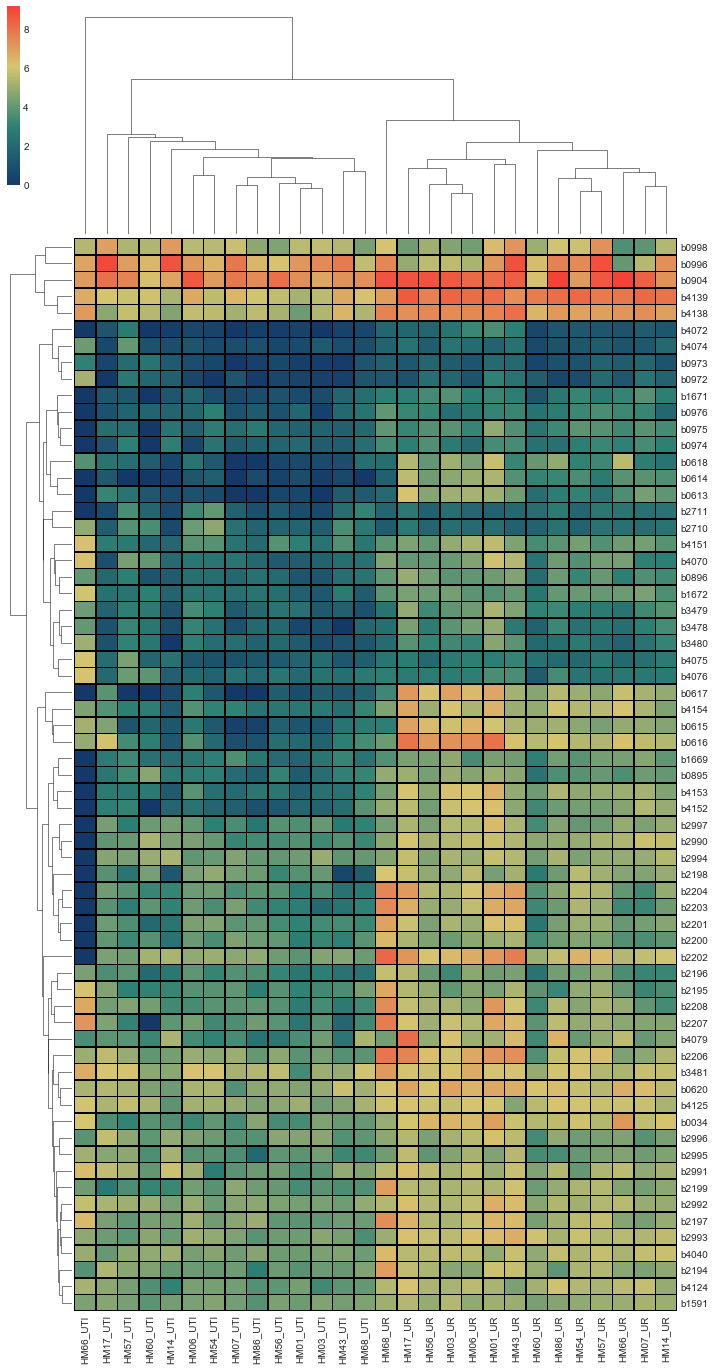

In [182]:
f = vis_regulon('narL', repressed, tpm, (12, 24))

In [87]:
gene_set = repressor_gmt
repressors_t_test = gseapy.gsea(data=tpm, gene_sets=gene_set, cls=cls, outdir=results_dir,
                                min_size=5, method="t_test")

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [90]:
res = pd.DataFrame(repressors_t_test.results).T
res = res[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]]
res_uti = res[(res.nes>0) & (res.pval < 0.05)].sort_values(by=["pval", "fdr"])
print(res)

              es       nes        pval        fdr geneset_size matched_size  \
acrR   -0.344671 -0.855819    0.629333          1           11            7   
agaR    0.708129   1.63309   0.0153846  0.0657905           11            8   
allR    0.379716  0.821244    0.723437   0.778952            9            7   
arcA   -0.253852  -1.17796    0.124378   0.847155          126           88   
argR    0.332138   1.03074    0.436893   0.568429           33           26   
cecR    0.647608    1.2704    0.125203   0.333809            5            5   
cpxR    0.355691   1.04798    0.411932   0.552074           24           19   
cra    -0.341586   -1.4679   0.0207469   0.326501           59           50   
crp      0.29775   1.15828    0.228869   0.443038          113           77   
csgD    0.817439   1.80187           0  0.0268839           15            7   
cueR    0.681308   1.34866    0.100977   0.266625            5            5   
cytR    0.489978   1.28511    0.166419   0.335996   

In [50]:
# df = pd.read_csv(data_set, index_col = 0)
# cls = [0]*14 + [1]*14 # list describing which condition each sample belongs to
# print(df.shape)
# print(df.head())


(2690, 28)
           HM01_UR      HM03_UR      HM06_UR      HM07_UR      HM14_UR  \
b0002  1809.173226  1485.090948  1034.399500  1882.376734  1672.556833   
b0003   638.119239   386.325207   543.177820   410.247872   556.587158   
b0004   481.900793   471.342594   385.642360   372.514702   471.173392   
b0006   744.472445   856.634156  1241.946217   967.414258   931.475941   
b0007   174.528339   191.999752   162.536585   177.158572   157.471925   

           HM17_UR      HM43_UR      HM54_UR      HM56_UR      HM57_UR  \
b0002  1734.666078  1299.616272  1543.683343  1807.172459   952.242212   
b0003   557.246473   528.651856   793.521540  1544.577527   432.660989   
b0004   551.062929   652.456361   722.918076   892.906532   471.076628   
b0006  1170.872322  1213.217941  1031.040801   978.762929  1190.496784   
b0007   243.704398   233.374802   250.949268   252.962263   363.202409   

          ...          HM14_UTI     HM17_UTI     HM43_UTI     HM54_UTI  \
b0002     ...       1777.

In [37]:
activators_t_test = gseapy.gsea(data=df, gene_sets=gene_set, cls=cls, outdir=outdir,
                        min_size=5, method="t_test")

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [49]:
res = pd.DataFrame(activators_t_test.results).T
res = res[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]]
print(res.shape[0])
res_uti = res[(res.nes<0) & (res.pval < 0.05)].sort_values(by=["pval", "fdr"])
print(res_uti)
res_uti.to_csv(os.path.join(outdir, "2018-07-17-t-test-a-uti.csv"))


56
                    es      nes       pval        fdr geneset_size  \
ECK120000275 -0.761567 -2.00866          0  0.0034911           12   
ECK120000311  -0.39372 -1.59107  0.0126126   0.103424          151   
ECK120001927 -0.643648 -1.68168  0.0196078  0.0709131           10   
ECK120000947 -0.464624 -1.55892  0.0307971   0.101351           38   

             matched_size                                              genes  
ECK120000275           10  b1187,b1288,b2316,b4018,b0954,b3256,b2323,b109...  
ECK120000311           57  b2579,b4382,b3845,b2239,b1237,b4032,b2241,b384...  
ECK120001927           10  b1040,b1038,b1039,b1037,b4133,b3185,b3190,b318...  
ECK120000947           26  b0871,b3924,b0762,b1611,b2159,b2237,b3037,b303...  


In [50]:
res_ur = res[(res.nes>0) & (res.pval < 0.05)].sort_values(by=["pval", "fdr"])
res_ur.to_csv(os.path.join(outdir, "2018-07-17-t-test-a-ur.csv"))
res_ur


,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000160,0.376158,2.05733,0,0.00273433,421,272,"b3429,b3430,b1622,b3357,b0757,b4138,b2804,b284..."
ECK120000540,0.68502,2.19788,0,0.00328119,38,20,"b2923,b2913,b0907,b3212,b0077,b2904,b2905,b290..."
ECK120003142,0.724414,2.0616,0,0.00410149,13,13,"b3661,b1003,b0382,b1004,b1040,b0964,b1038,b104..."
ECK120002995,0.550048,1.93503,0,0.00861312,31,28,"b0782,b0784,b0783,b1221,b2202,b0785,b2199,b220..."
ECK120002953,0.754196,1.91206,0.00222717,0.00820298,10,9,"b3236,b0617,b0620,b3093,b0614,b0615,b0616,b061..."
ECK120000811,0.564702,1.86665,0.00430108,0.0131248,38,20,"b1482,b0095,b3510,b3509,b1492,b3506,b3507,b351..."
ECK120000812,0.564702,1.85155,0.00631579,0.0133591,38,20,"b1482,b0095,b3510,b3509,b1492,b3506,b3507,b351..."
ECK120002126,0.564175,1.71216,0.00838574,0.0419992,23,16,"b2741,b1492,b3506,b1237,b3507,b3516,b3511,b045..."
ECK120001498,0.465001,1.71838,0.00854701,0.0448429,66,34,"b0889,b3212,b1482,b0095,b3510,b3509,b1492,b017..."
ECK120001481,0.469021,1.70402,0.00873362,0.0413132,32,29,"b2202,b1796,b0872,b2199,b2204,b1797,b2206,b219..."


In [40]:
activators_log2 = gseapy.gsea(data=df, gene_sets=gene_set, cls=cls, outdir=outdir, min_size=5)

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [41]:
res2 = pd.DataFrame(activators_log2.results).T
res2 = res2[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]]
print(res2.shape[0])
res2_uti = res2[(res2.nes<0) & (res2.pval < 0.05)].sort_values(by=["pval", "fdr"])
res2_uti


56


,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000275,-0.682966,-1.81589,0.0112676,0.0671615,12,10,"b2316,b1288,b1187,b4018,b2323,b3256,b1092,b095..."
ECK120000313,-0.336339,-1.40873,0.0273224,0.459821,78,54,"b2243,b2242,b2241,b2204,b0655,b2203,b4072,b192..."
ECK120000947,-0.426292,-1.48488,0.048583,0.459084,38,26,"b0871,b1611,b0762,b3924,b2237,b2159,b3037,b303..."


In [31]:
active_results_uti_merge = pd.merge(res_uti, res2_uti, how="outer", left_index=True, right_index=True)
active_results_uti_merge
active_results_uti_merge.to_csv(os.path.join(outdir, "2018-07-17-active-uti.csv"))

In [33]:
res2_ur = res2[(res2.nes>0) & (res2.pval < 0.05)].sort_values(by=["pval", "fdr"])
res2_ur
active_results_ur_merge = pd.merge(res_ur, res2_ur, how="outer", left_index=True, right_index=True)
active_results_ur_merge
#active_results_ur_merge.to_csv(os.path.join(outdir, "2018-07-17-active-ur.csv"))

In [42]:
res2_ur

,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000160,0.602941,2.40559,0,0,421,272,"b3708,b4311,b0344,b4310,b3132,b3222,b3223,b356..."
ECK120000811,0.807535,2.19892,0,0,38,20,"b1480,b3510,b1492,b3509,b1482,b3506,b3516,b413..."
ECK120000812,0.807535,2.2831,0,0,38,20,"b1480,b3510,b1492,b3509,b1482,b3506,b3516,b413..."
ECK120001498,0.718606,2.217,0,0,66,34,"b1480,b3510,b1492,b3509,b1482,b3506,b3516,b351..."
ECK120002953,0.890867,2.01682,0,0.000210943,10,9,"b3093,b0614,b0617,b0613,b0618,b3236,b0616,b061..."
ECK120003142,0.775082,1.9686,0,0.000351572,13,13,"b1004,b1040,b1003,b0382,b1039,b1038,b1042,b366..."
ECK120004419,0.874483,1.81421,0,0.0028628,8,7,"b3939,b3940,b0199,b0197,b0198,b2762,b0734"
ECK120002334,0.863628,1.81802,0,0.00292075,9,7,"b3708,b3510,b3709,b3509,b3508,b0998,b0996"
ECK120000961,0.863193,1.80763,0,0.00295321,7,7,"b2703,b2702,b2705,b2704,b2706,b2708,b2707"
ECK120002449,0.945996,1.79776,0,0.00316415,6,5,"b3566,b3565,b3567,b3568,b3569"


In [43]:
df = pd.read_csv(data_set, index_col = 0)
gene_set = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/regulon_analysis/repressor.gmt"
repressors_t_test = gseapy.gsea(data=df, gene_sets=gene_set, cls=cls, outdir=outdir, min_size=5, method="t_test")

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [51]:
rres = pd.DataFrame(repressors_t_test.results).T
rres = rres[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]]
print(rres.shape[0])
rres_uti = rres[(rres.nes>0) & (rres.pval < 0.05)].sort_values(by=["pval", "fdr"])
rres_uti.to_csv(os.path.join(outdir, "2018-07-17-t-test-r-uti.csv"))
rres_uti

64


,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000540,0.626422,2.19725,0,0,85,28,"b0889,b2913,b0077,b3454,b3456,b1482,b1243,b229..."
ECK120000636,0.527333,2.28622,0,0,87,67,"b4138,b4139,b1671,b1669,b4153,b4040,b4152,b415..."
ECK120000581,0.708943,2.05169,0,0.000525849,15,14,"b2153,b0197,b0199,b3828,b3008,b0198,b3829,b394..."
ECK120004180,0.799031,1.94307,0,0.00670457,11,8,"b3137,b3136,b3139,b3138,b3140,b3141,b3132,b3133"
ECK120000352,0.429483,1.86396,0,0.0157755,110,67,"b4019,b3212,b3070,b2741,b3409,b1243,b0585,b016..."
ECK120002377,0.767425,1.80948,0,0.0195221,9,7,"b3094,b3092,b1521,b4322,b3093,b3091,b4324"
ECK120000357,0.752796,1.84319,0.002079,0.0155125,11,8,"b0757,b0756,b0758,b0759,b2149,b2837,b2150,b2151"
ECK120000450,0.376932,1.58732,0.00222222,0.0916104,144,62,"b0889,b0757,b0077,b0756,b0758,b1482,b4238,b196..."
ECK120004225,0.762579,1.72918,0.00395257,0.0436454,10,7,"b3222,b3223,b3225,b3221,b4310,b4309,b4311"
ECK120000358,0.752796,1.82222,0.00408998,0.0187052,11,8,"b0757,b0756,b0758,b0759,b2149,b2837,b2150,b2151"


In [45]:
repressors_log2 = gseapy.gsea(data=df, gene_sets=gene_set, cls=cls, outdir=outdir, min_size=5)

/anaconda/envs/biology/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [46]:
rres2 = pd.DataFrame(repressors_log2.results).T
rres2 = rres2[["es", "nes", "pval", "fdr", "geneset_size", "matched_size", "genes"]]
print(rres2.shape[0])
rres2_uti = rres2[(rres2.nes>0) & (rres2.pval < 0.05)].sort_values(by=["pval", "fdr"])
rres2_uti

64


,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000540,0.711041,2.09934,0,0,85,28,"b3510,b3509,b1482,b3769,b3770,b3771,b3772,b007..."
ECK120000581,0.808216,2.07033,0,0,15,14,"b3829,b3941,b4013,b3828,b3939,b3940,b3008,b019..."
ECK120004180,0.960104,2.13503,0,0,11,8,"b3137,b3132,b3139,b3136,b3138,b3133,b3140,b3141"
ECK120004225,0.9918,2.0713,0,0,10,7,"b4311,b4310,b3222,b3223,b3225,b4309,b3221"
ECK120000357,0.90747,1.96954,0,0.000381888,11,8,"b2150,b2149,b0757,b0758,b0756,b2151,b0759,b2837"
ECK120000358,0.90747,1.98794,0,0.000458265,11,8,"b2150,b2149,b0757,b0758,b0756,b2151,b0759,b2837"
ECK120001325,0.740878,1.9276,0,0.00130933,20,15,"b3510,b1492,b1040,b3509,b1039,b1038,b3512,b104..."
ECK120000636,0.542494,1.88786,0,0.00200491,87,67,"b0614,b0617,b0613,b0618,b4152,b0616,b4153,b061..."
ECK120002159,0.846867,1.84559,0,0.00330969,10,8,"b3575,b3581,b3582,b3576,b3579,b3583,b3574,b3580"
ECK120000963,0.863193,1.79123,0,0.00583247,7,7,"b2703,b2702,b2705,b2704,b2706,b2708,b2707"


In [52]:
rres_ur = rres[(rres.nes<0) & (rres.pval < 0.05)].sort_values(by=["pval", "fdr"])
rres_ur.to_csv(os.path.join(outdir, "2018-07-17-t-test-r-ur.csv"))
rres_ur

,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000526,-0.455729,-1.74815,0.003663,0.111518,59,44,"b0095,b1741,b2009,b0708,b0094,b0958,b1860,b008..."
ECK120000791,-0.499278,-1.73921,0.0069808,0.061478,31,31,"b2551,b2904,b2905,b2903,b0033,b0032,b2553,b231..."
ECK120000332,-0.433024,-1.69591,0.00746269,0.0465851,59,50,"b3956,b2097,b0118,b3919,b1818,b2712,b2388,b181..."
ECK120000229,-0.675802,-1.71888,0.0289256,0.0509934,11,9,"b3461,b1415,b2234,b2235,b3701,b3702,b2507,b250..."


In [48]:
rres2_ur = rres2[(rres2.nes<0) & (rres2.pval < 0.05)].sort_values(by=["pval", "fdr"])
rres2_ur

,es,nes,pval,fdr,geneset_size,matched_size,genes
ECK120000791,-0.514371,-1.87335,0,0.0194301,31,31,"b2904,b2905,b2903,b2551,b0033,b0032,b2553,b231..."
ECK120000332,-0.453828,-1.91228,0,0.0254357,59,50,"b2097,b0118,b2712,b3956,b1818,b3366,b1817,b391..."
ECK120000526,-0.379294,-1.52495,0.0241546,0.204016,59,44,"b0708,b2009,b1741,b0095,b0958,b0094,b1860,b008..."
ECK120002020,-0.699436,-1.51412,0.040201,0.175789,9,6,"b4063,b0464,b0463,b1531,b1532,b4062"


In [34]:
r_results_uti_merge = pd.merge(rres_uti, rres2_uti, how="outer", left_index=True, right_index=True)
r_results_uti_merge.to_csv(os.path.join(outdir, "2018-07-17-rep-uti.csv"))
r_results_ur_merge = pd.merge(rres_ur, rres2_ur, how="outer", left_index=True, right_index=True)
r_results_ur_merge.to_csv(os.path.join(outdir, "2018-07-17-rep-ur.csv"))